<a href="https://colab.research.google.com/github/babaroscopy/colab/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

In [ ]:
class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    
    def transform(self,X,y):        #to reduce the dimensions of the input data
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        # scatter_b = sum( num_classes * (mean_X_c - mean_overall)^2 )
        scatter_t = np.cov(X.T)*(height - 1)
        scatter_w = 0       #scatter_w matrix denotes the intra-class covariance
        # scatter_w = sum((X_c - mean_X_c)^2 )
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
        
        scatter_b = scatter_t - scatter_w       #scatter_b is the inter-class covariance matrix
        # An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it. 
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        print(eig_vectors.shape)
        pc = X.dot(eig_vectors[:,::-1][:,:self.n_components])       #The first n_components are selected using the slicing operation
        print(pc.shape)


#If n_components is equal to 2, we plot the two components, considering each vector as one axis
        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                colors = ['r','g','b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=color)
            plt.show()
        return pc

In [ ]:
LDA_obj = LDA(n_components=2)
data = load_iris()
X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

(4, 4)
(120, 2)


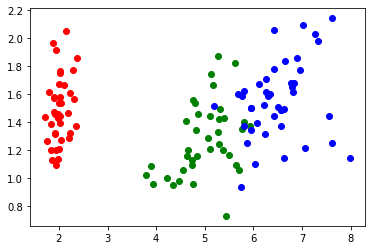

Original Data Size (Iris): (120, 4) 
Modified Data Size (Iris): (120, 2)


In [ ]:
LDA_object = LDA(n_components=2)
X_train_modified = LDA_object.transform(X_train, Y_train)
print("Original Data Size (Iris):",X_train.shape, "\nModified Data Size (Iris):", X_train_modified.shape)

In [ ]:
LDA_obj = LDA(n_components=3)
data = load_wine()
X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
LDA_object = LDA(n_components=3)
X_train_modified = LDA_object.transform(X_train, Y_train)
print("Original Data Size (Wine):",X_train.shape, "\nModified Data Size (Wine):", X_train_modified.shape)

(13, 13)
(142, 3)
Original Data Size (Wine): (142, 13) 
Modified Data Size (Wine): (142, 3)


In [ ]:
LDA_obj = LDA(n_components=2)
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

(30, 30)
(455, 2)


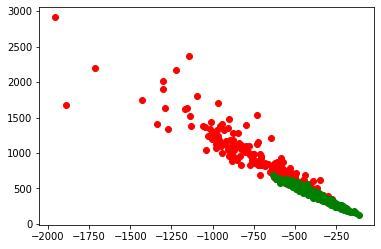

Original Data Size (Breast Cancer): (455, 30) 
Modified Data Size (Breast Cancer): (455, 2)


In [ ]:
LDA_object = LDA(n_components=2)
X_train_modified = LDA_object.transform(X_train, Y_train)
print("Original Data Size (Breast Cancer):",X_train.shape, "\nModified Data Size (Breast Cancer):", X_train_modified.shape)